# Project – Analyzing the trends of COVID-19 with Python






## Introduction
 The dataset  provide a time-series overview of COVID-19 cases, tracking the progression of confirmed cases, deaths, and recoveries over time for different regions and countries.

 ## Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
of rate of infection and recovery as well as make predictions about the number of cases
expected a week in future based on the current trends

- Used pandas to accumulate data from multiple data files  
-  Use plotly (visualization library) to create interactive visualizations   
- Used Facebook prophet library to make time series models  
- Visualized the prediction by combining these technologies

## Data
The dataset  provides a time-series overview of COVID-19 cases, tracking the progression of confirmed cases, deaths, and recoveries over time for different regions and countries.  

**Features information**
- Province/State: This column likely represents the specific region or administrative division within a country where the data was recorded. Some entries may have NaN (Not a Number), indicating missing values.

- Country/Region: This column denotes the country or region where the COVID-19 data is reported.

- Lat and Long: These columns provide the latitude and longitude coordinates of the location, specifying its geographical position.

- Date: This column represents the date on which the COVID-19 data was recorded.

- Confirmed: The number of confirmed COVID-19 cases reported on the given date and in the specified location.

- Deaths: The number of deaths reported on the given date and in the specified location due to COVID-19.

- Recovered: The number of individuals who have recovered from COVID-19 in the specified location by the given date.

- Active: The number of currently active COVID-19 cases, calculated as (Confirmed - Deaths - Recovered).

- WHO Region: This column categorizes the location into one of the World Health Organization (WHO) regions.






In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px #chloropleth
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load the data
data = pd.read_csv("covid_19_clean_complete (18).csv", parse_dates=['Date'])
#to change data type of date column used the parse_date function

In [ ]:
data.head()#examining the data


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


Observation
- This dataset has around 49068 observations with 10 columns and it is a mix between categorical and numeric values.

##Data Cleaning

In [ ]:
#Renaming the columns only for simpliciy reason
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data['date'].value_counts()#checking Uniqe variable

2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: date, Length: 188, dtype: int64

Observation :
- There are 188 date and every date is reapeating 261 time.so its difficult to analyse.
- Lets take  a specific date to check how much cases on a specific date.

In [ ]:
data['date'].max()#taking the last value to anlyse

Timestamp('2020-07-27 00:00:00')

In [ ]:
#To find all the cases on last value in date
top = data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


Observation:
- we can observer how many confirmed cases,deaths,recovered,active cases by county.
- -There is posibility of dupliate country.
- lets only focus on above features by country.

In [ ]:
#to eliminate duplicate country
w = top.groupby('country')['confirmed',	'deaths'	,'recovered',	'active'].sum()
w = w.reset_index() #to get country as columns
w

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


Observation:
- There are 187 countries are present in tha dat set
- Now we have the country name we can use choropleth

##Visualization

In [ ]:
#choropleth - A choropleth map is a thematic map that is used to represent statistical data
#using the color mapping symbology technique.

fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

Observation:
- This provides us a way to visualise values over a country ,which is showing  confirmed cases,deaths,recovered,active casess like a heat map
.

Text(0.5, 0, 'Dates')

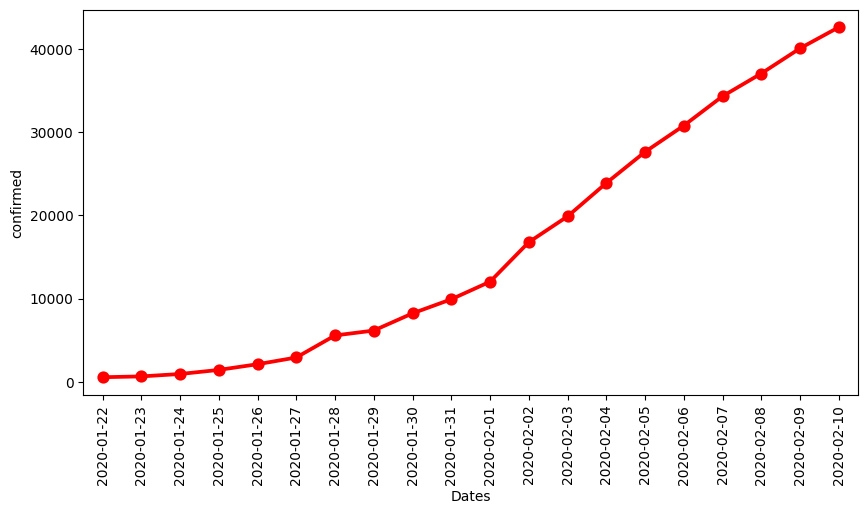

In [ ]:
#plot for confirmed cases based on date
plt.figure(figsize=(10,5))

t_cases = data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date'] = pd.to_datetime(t_cases['date'])

#point plot
sns.pointplot(x = t_cases['date'].dt.date.head(20), y=t_cases['confirmed'].head(20), color='r')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Dates',fontsize=10)

Observation:
- We can see from above plot confirmed cases are increasing over a period of time

In [ ]:
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


##Prediction Ussing FB_Prophet

In [ ]:
#Fb Prophet

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# as our model takes a date colmn and target column we are creating 3 df
confirmed = data.groupby('date')['confirmed'].sum().reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
active = data.groupby('date').sum()['active'].reset_index()

##Forecast on confirmed cases

In [ ]:
confirmed.columns = ['ds', 'y']#date column = ds and traget column = y
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail() #last 5 rows

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
m = Prophet()
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/ybjtrs_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/0xaekch8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32847', 'data', 'file=/tmp/tmp7nxfr9lq/ybjtrs_n.json', 'init=/tmp/tmp7nxfr9lq/0xaekch8.json', 'output', 'file=/tmp/tmp7nxfr9lq/prophet_modelurqznuy9/prophet_model-20240402074329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=7, freq='D')#for prediction for next 7 days
future.tail(12)

,ds
183,2020-07-23
184,2020-07-24
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)#yhat is prediction value

,ds,yhat,yhat_lower,yhat_upper
183,2020-07-23,1.531598e+07,1.521134e+07,1.542337e+07
184,2020-07-24,1.553116e+07,1.542577e+07,1.564114e+07
185,2020-07-25,1.573882e+07,1.563336e+07,1.584460e+07
186,2020-07-26,1.593636e+07,1.583103e+07,1.604145e+07
187,2020-07-27,1.613095e+07,1.602733e+07,1.623254e+07
188,2020-07-28,1.632020e+07,1.620761e+07,1.642954e+07
189,2020-07-29,1.652997e+07,1.642715e+07,1.664275e+07
190,2020-07-30,1.674391e+07,1.663840e+07,1.685571e+07
191,2020-07-31,1.695910e+07,1.684822e+07,1.705620e+07
192,2020-08-01,1.716676e+07,1.705174e+07,1.727297e+07


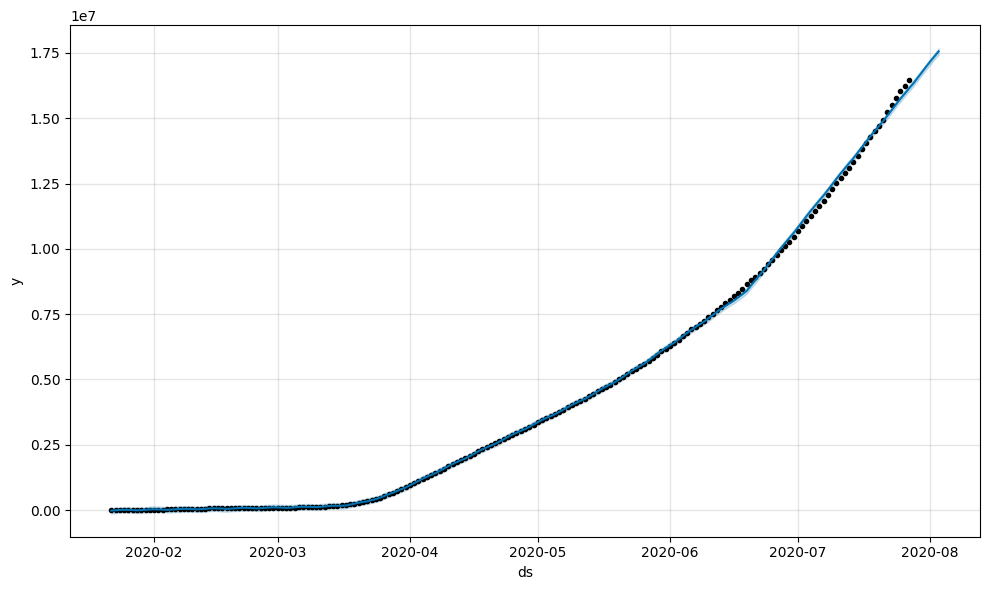

In [ ]:
confirmed_cases_forecast = m.plot(forecast)

Observation:
Prediction through Prophet for a count of confirmed cases (for the next 7 days), where the x-axis is “ds” and y-axis is “y” which is the target.

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int) #converting into int type

In [ ]:
forecast[['ds','yhat']].tail(12)

,ds,yhat
183,2020-07-23,15315975
184,2020-07-24,15531164
185,2020-07-25,15738824
186,2020-07-26,15936363
187,2020-07-27,16130952
188,2020-07-28,16320199
189,2020-07-29,16529972
190,2020-07-30,16743908
191,2020-07-31,16959097
192,2020-08-01,17166757


##Forecast on Death cases

In [ ]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/w6kmvhix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/xmw5btci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44561', 'data', 'file=/tmp/tmp7nxfr9lq/w6kmvhix.json', 'init=/tmp/tmp7nxfr9lq/xmw5btci.json', 'output', 'file=/tmp/tmp7nxfr9lq/prophet_model93qda1uh/prophet_model-20240402075955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,733903.099575,725335.586659,744234.716528
205,2020-08-14,739418.098237,729850.437077,750666.130022
206,2020-08-15,744300.130882,734032.782859,756108.095578
207,2020-08-16,748437.048945,737018.743179,761779.979766
208,2020-08-17,752727.363324,740358.936206,766768.330013


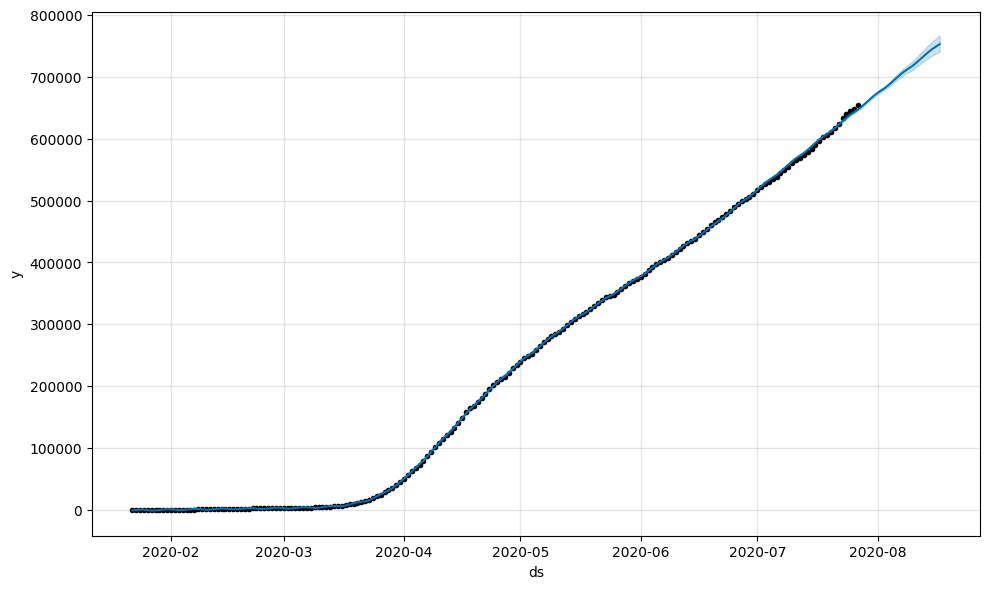

In [ ]:
deaths_forecast_plot = m.plot(forecast)

Observation:
Prediction through Prophet for a count of confirmed cases (for the next 7 days), where the x-axis is “ds” and y-axis is “y” which is the target.

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,633800
185,2020-07-25,638682
186,2020-07-26,642819
187,2020-07-27,647109
188,2020-07-28,652315
189,2020-07-29,657882
190,2020-07-30,663491
191,2020-07-31,669006
192,2020-08-01,673888
193,2020-08-02,678025


##Forecast on recovered cases

In [ ]:
recovered.head()

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [ ]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/xt4wx3mu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/kb31mbjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9174', 'data', 'file=/tmp/tmp7nxfr9lq/xt4wx3mu.json', 'init=/tmp/tmp7nxfr9lq/kb31mbjf.json', 'output', 'file=/tmp/tmp7nxfr9lq/prophet_model15eaaq6i/prophet_model-20240402080354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,1.150759e+07,1.135201e+07,1.165644e+07
205,2020-08-14,1.164899e+07,1.147333e+07,1.180492e+07
206,2020-08-15,1.178915e+07,1.160135e+07,1.195508e+07
207,2020-08-16,1.191513e+07,1.171128e+07,1.208233e+07
208,2020-08-17,1.205163e+07,1.184404e+07,1.224942e+07


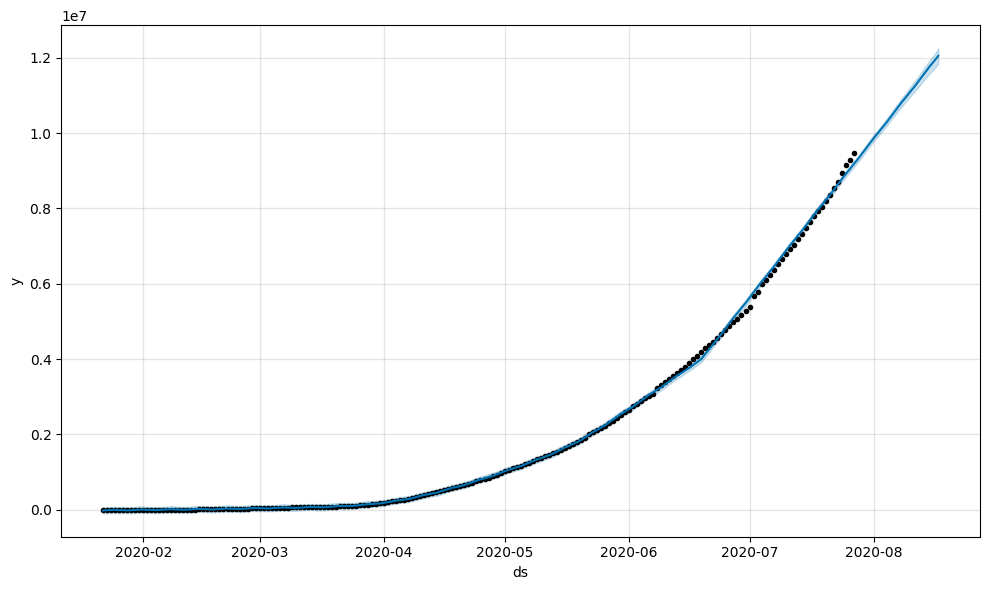

In [ ]:
recovered_forecast_plot = m.plot(forecast)

Observation:
Prediction through Prophet for a count of confirmed cases (for the next 7 days), where the x-axis is “ds” and y-axis is “y” which is the target.

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,8781278
185,2020-07-25,8921439
186,2020-07-26,9047413
187,2020-07-27,9183913
188,2020-07-28,9311027
189,2020-07-29,9453130
190,2020-07-30,9595783
191,2020-07-31,9737182
192,2020-08-01,9877343
193,2020-08-02,10003318


##Forecast on active cases

In [ ]:
active.head()

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


In [ ]:
active.columns = ['ds', 'y']
active['ds']= pd.to_datetime(active['ds'])

In [ ]:
m = Prophet()
m.fit(active)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/7pka3wbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7nxfr9lq/avxjdzrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1825', 'data', 'file=/tmp/tmp7nxfr9lq/7pka3wbr.json', 'init=/tmp/tmp7nxfr9lq/avxjdzrw.json', 'output', 'file=/tmp/tmp7nxfr9lq/prophet_modelnwiofss8/prophet_model-20240402084026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:40:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:40:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,7.353017e+06,7.250446e+06,7.444267e+06
205,2020-08-14,7.421059e+06,7.309422e+06,7.522120e+06
206,2020-08-15,7.483224e+06,7.369149e+06,7.598947e+06
207,2020-08-16,7.550515e+06,7.417955e+06,7.671657e+06
208,2020-08-17,7.604265e+06,7.477152e+06,7.739359e+06


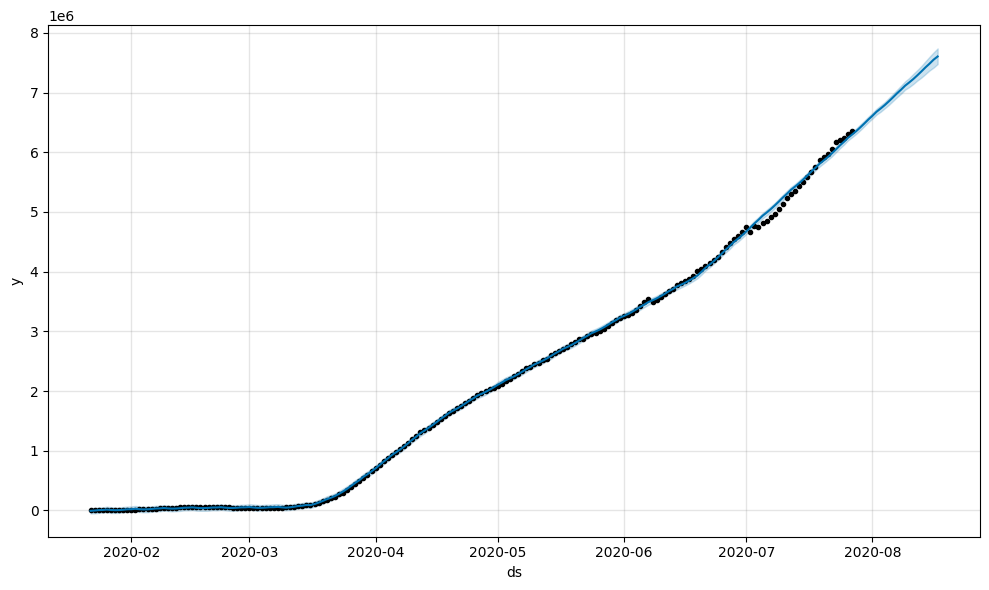

In [ ]:
deaths_forecast_plot = m.plot(forecast)

Observation:
Prediction through Prophet for a count of confirmed cases (for the next 7 days), where the x-axis is “ds” and y-axis is “y” which is the target.

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,6113443
185,2020-07-25,6175608
186,2020-07-26,6242899
187,2020-07-27,6296649
188,2020-07-28,6353415
189,2020-07-29,6415814
190,2020-07-30,6481273
191,2020-07-31,6549315
192,2020-08-01,6611479
193,2020-08-02,6678771
